Emotion AI. Detectar los 30 puntos faciales

Vamos a importar los dataset y analizar los datos que tenemos.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:

from tensorflow import keras
from keras.applications import DenseNet121
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras import backend as K
from keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL
import seaborn as sns
import pickle
from PIL import Image
import cv2
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [6]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [7]:
df['Image'].shape[0]

2140

In [8]:
df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [9]:
# Dado que los valores de la imagen son cadenas separadas por espacios
# Necesitamos convertirlo a una matriz de 1d a una de 2d (96,96)
# np.fromstring

df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [10]:
df['Image'][0].shape

(96, 96)

## Actividad 1
### Obtener el promedio, máximo y el mínimo solo para el right_eye_center_x

In [11]:
df.right_eye_center_x.describe()

count    2140.000000
mean       29.640269
std         2.051575
min        18.922611
25%        28.472224
50%        29.655440
75%        30.858673
max        42.495172
Name: right_eye_center_x, dtype: float64

In [12]:
df.right_eye_center_y.describe()

count    2140.000000
mean       37.063815
std         2.234334
min        24.773072
25%        35.818377
50%        37.048085
75%        38.333884
max        45.980981
Name: right_eye_center_y, dtype: float64

Vamos a visualizar las imágenes

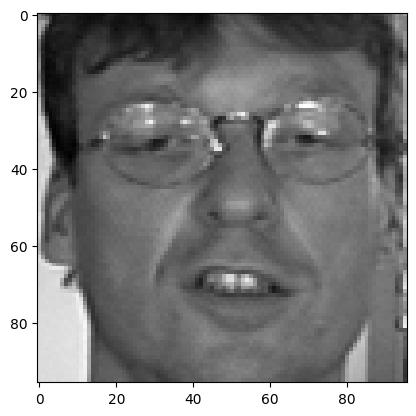

In [13]:
i = np.random.randint(0, len(df)-1)
plt.imshow(df['Image'][i], cmap='gray')
plt.show()

Vamos a dibujar los 15 puntos X e Y

C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\3575253471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')


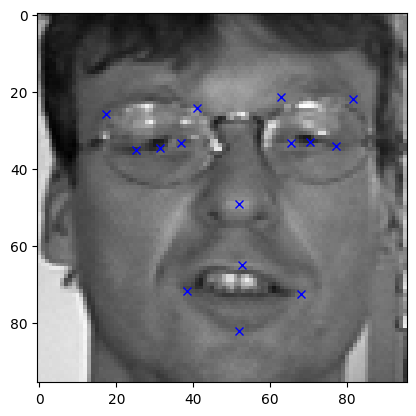

In [14]:
plt.imshow(df['Image'][i], cmap='gray')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')

Dibujar las 16 primeras imágenes en 4 x 4

C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\3523134092.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


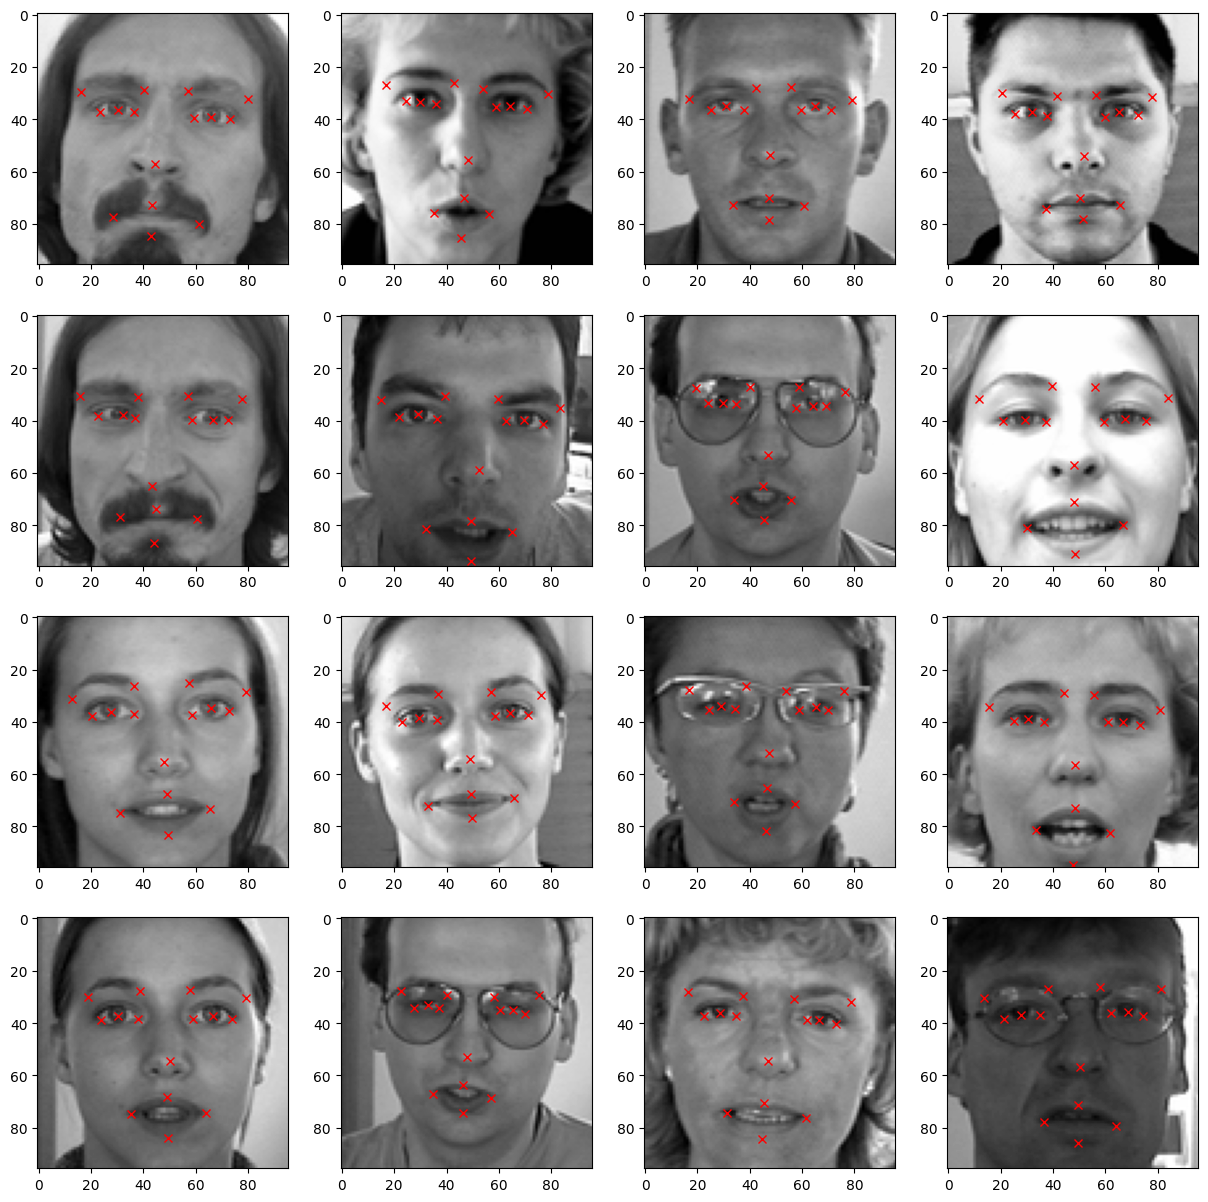

In [15]:
fig = plt.figure(figsize = (15, 15))
for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

Dibujar 64 fotos de manera aleatoria

C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\3364414162.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


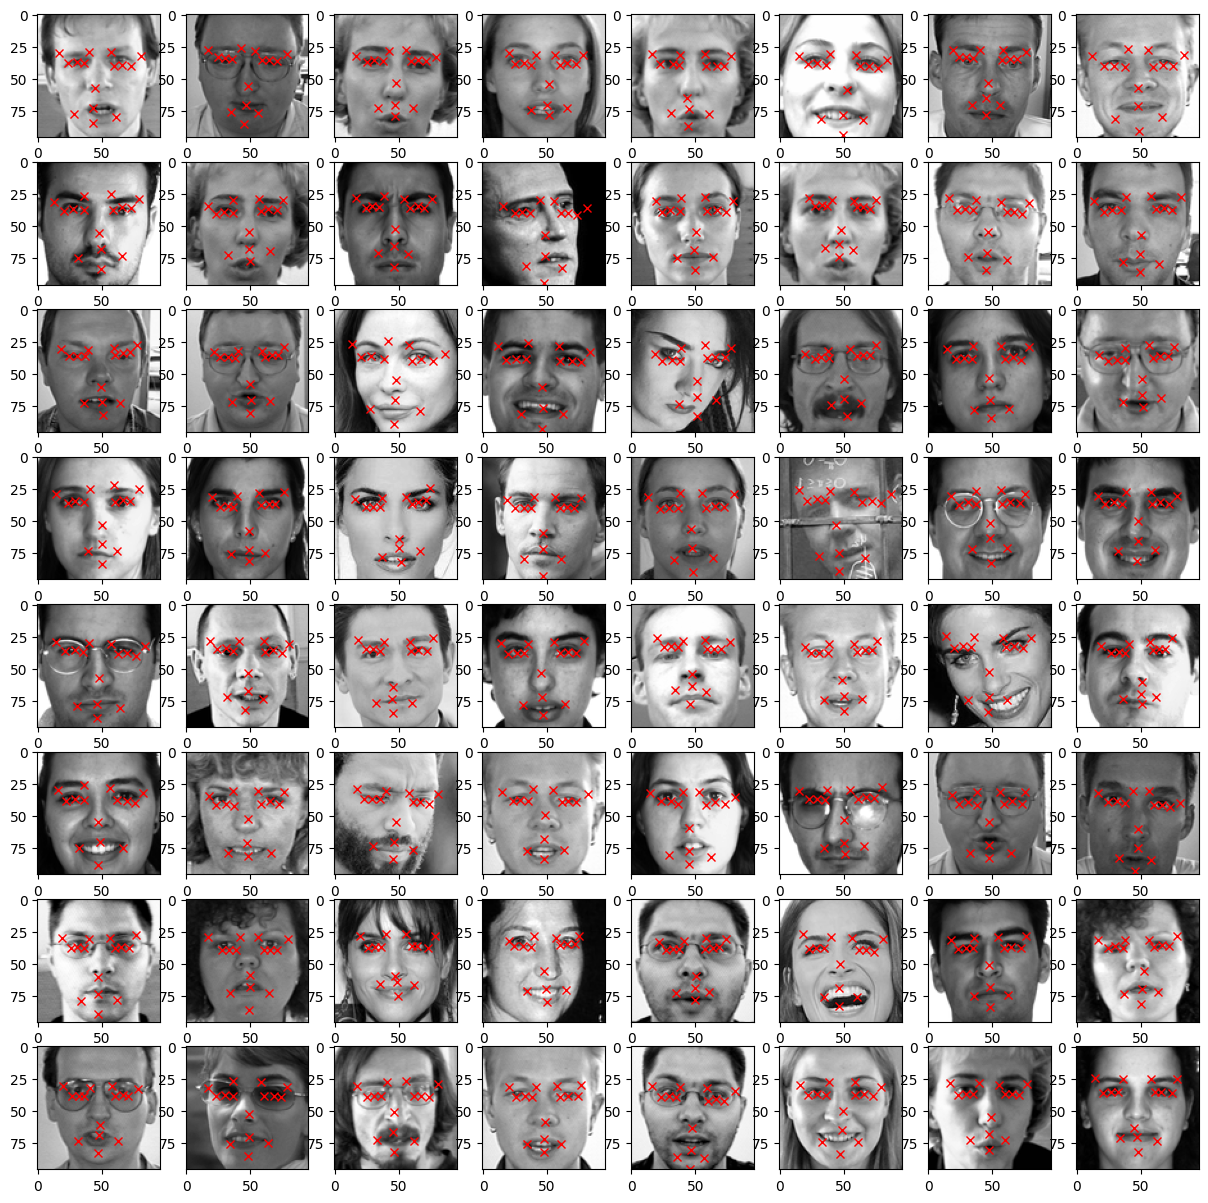

In [16]:
fig = plt.figure(figsize = (15, 15))
for i in range(64):
    random = np.random.randint(0, len(df)-1)
    fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(df['Image'][random], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

Más imágenes. ¿Qué vamos a hacer aquí?

In [17]:
# Vamos a crear una copia del dataframe
import copy

### Voltear la imagen horizontalmente

Text(0.5, 1.0, 'Imagen Volteada')

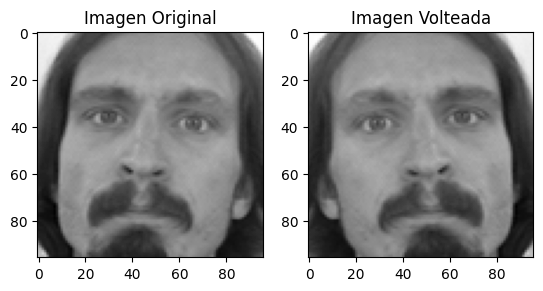

In [18]:
plt.subplot(1, 2, 1)
plt.imshow(df['Image'][0], cmap = 'gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
df2 = copy.copy(df)
df2['Image'] = df2['Image'].apply(lambda x: np.fliplr(x))
plt.imshow(df2['Image'][0], cmap = 'gray')
plt.title('Imagen Volteada')

Dado que estamos volteando horizontalmente solo necesitamos cambiar los puntos x. Para ello tenemos que restar nuestros valores de la cooredena x al ancho de la imagen

C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\89821263.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')
C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\89821263.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df2.loc[0][j-1], df2.loc[0][j], 'bx')


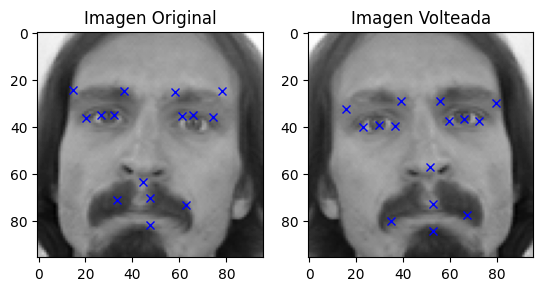

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(df['Image'][0], cmap='gray')
plt.title('Imagen Original')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')

plt.subplot(1, 2, 2)
columns = df2.columns[:-1]
for i in range(29):
    if i % 2 == 0:
        df2[columns[i]] = df2[columns[i]].apply(lambda x: 96 - x)
plt.imshow(df2['Image'][0], cmap = 'gray')
plt.title('Imagen Volteada')
for j in range(1,31,2):
    plt.plot(df2.loc[0][j-1], df2.loc[0][j], 'bx')


### Voltear la imagen verticalmente

C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\322752461.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')
C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\322752461.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df3.loc[0][j-1], df3.loc[0][j], 'bx')


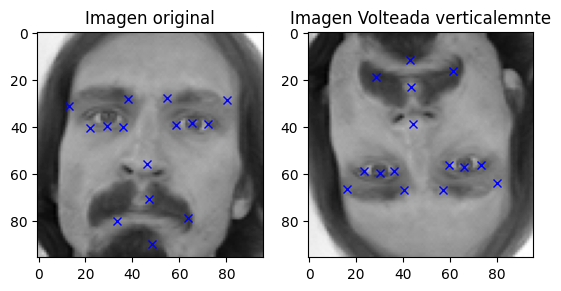

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(df['Image'][0], cmap='gray')
plt.title('Imagen original')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')
    
plt.subplot(1, 2, 2)
df3 = copy.copy(df)
# Voltear foto
df3['Image'] = df3['Image'].apply(lambda x: np.flipud(x))
# Voltear X
for i in range(len(columns)):
  if i%2 == 1:
    df3[columns[i]] = df3[columns[i]].apply(lambda x: 96. - float(x) )
plt.imshow(df3['Image'][0], cmap='gray')
plt.title('Imagen Volteada verticalemnte')
for j in range(1,31,2):
    plt.plot(df3.loc[0][j-1], df3.loc[0][j], 'bx')


### Aumentar aleatoriamente el brillo

Ejercicio
* Vamos a aumentar aleatoriamente el brillo de nuestras imágenes

* Para ellos se multiplica los píxeles por valores aleatorios entre 1,5 y 2
* OJO!! Que el valor tiene que estar entre 0 y 255

Se ajusta un  1.974022116919419 de brillo


C:\Users\Adri\AppData\Local\Temp\ipykernel_7104\3422976269.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Image'][0] = np.clip(df4['Image'][0] * ajuste_brillo[0][0], 0, 255).astype(np.uint8)


Text(0.5, 1.0, 'Imagen con más brillo')

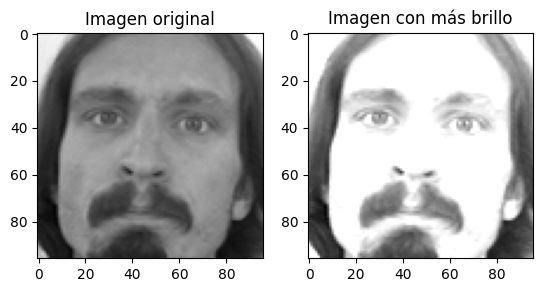

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(df['Image'][0], cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
df4 = copy.copy(df)
ajuste_brillo = np.random.uniform(1.5, 2.0, size=df4['Image'][0].shape)
print("Se ajusta un ", ajuste_brillo[0][0], "de brillo")
df4['Image'][0] = np.clip(df4['Image'][0] * ajuste_brillo[0][0], 0, 255).astype(np.uint8)
plt.imshow(df4['Image'][0], cmap='gray')
plt.title('Imagen con más brillo')

1) Cargar los datos y sannity check
2) Visualizarlos
3) Aumentación de las imágenes

Ejercicio para pensar y reflexionar

Vamos a quedarnos en una variable img solo con las imágenes y las normalizamos


Y ahora tenemos que pasar a nuestro modelo las x, y
¿Qué son las x? => Las imágenes
Y las y => coordenadas x e y
NOTA: Mi modelo en la última capa tendrá 30 neuronas

Tenemos una lista de imágenes con dimensiones (96, 96) en un array y necesitamos un array tridimensional X con dimensiones (número de imágenes, 96, 96, 1), donde la última dimensión de tamaño 1 indica que la imagen es en escala de grises. Esto es comúnmente necesario cuando se trabaja con modelos de redes neuronales que esperan imágenes en formato (altura, anchura, canales)

In [22]:
img = df3["Image"]

In [23]:
type(img)

pandas.core.series.Series

In [24]:
df5 = pd.DataFrame(df3)

In [25]:
type(df5)

pandas.core.frame.DataFrame

In [26]:
numpy_array = df5.values

In [27]:
type(numpy_array)

numpy.ndarray

In [28]:
img=numpy_array[:,30]

In [29]:
len(img)

2140

In [30]:
# Normalizamos las imágenes
img = img/255.

# Creamos un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo
X = np.empty((len(img), 96, 96, 1))

# Iteramos sobre la lista de imágenes y las añadimos al array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convertimos el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(2140, 96, 96, 1)

Es necesario porque los modelos de aprendizaje profundo, especialmente aquellos basados en convoluciones, esperan tensores de cierta forma como entrada, y la dimensión del canal es importante incluso si tienes solo un canal en escala de grises.

In [31]:
# Obtenemos el valor de las coordenadas x & y que se utilizarán como target.
y = df3.drop(["Image"], axis=1)
y.shape

(2140, 30)

In [32]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
def res_block(X, filter, stage):
  # Copia del tensor de entrada
  X_copy = X

  # Descomponer el filtro en f1, f2 y f3
  f1 , f2, f3 = filter

  # Camino Principal
  # Capa de convolución 1x1 seguida de Max Pooling, Batch Normalization y activación ReLU
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  # Capa de convolución 3x3 con relleno 'same', Batch Normalization y activación ReLU
  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  # Capa de convolución 1x1, Batch Normalization
  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Camino Corto
  # Capa de convolución 1x1 seguida de Max Pooling y Batch Normalization
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir el camino corto al camino principal
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X

  # Camino Principal
  # Capa de convolución 1x1, Batch Normalization y activación ReLU
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  # Capa de convolución 3x3 con relleno 'same', Batch Normalization y activación ReLU
  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  # Capa de convolución 1x1, Batch Normalization
  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir el camino corto al camino principal
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X

  # Camino Principal
  # Capa de convolución 1x1, Batch Normalization y activación ReLU
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  # Capa de convolución 3x3 con relleno 'same', Batch Normalization y activación ReLU
  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  # Capa de convolución 1x1, Batch Normalization
  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir el camino corto al camino principal
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


In [35]:
# Tamaño del tensor de entrada
input_shape = (96, 96, 1)
X_input = Input(input_shape)
print(X_input)


KerasTensor(type_spec=TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [36]:


# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
# Capa de convolución 7x7 con 64 filtros y strides (2,2), seguida de Batch Normalization y activación ReLU
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
# Max Pooling 3x3 con strides (2,2)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
# Bloque residual con filtro [64, 64, 256] en la etapa 2
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
# Bloque residual con filtro [128, 128, 512] en la etapa 3
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
# Bloque residual con filtro [256, 256, 1024] en la etapa 4
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling 2x2
X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

# Capa Final
# Aplanar el tensor
X = Flatten()(X)
# Capa completamente conectada (Dense) con 4096 neuronas y activación ReLU
X = Dense(4096, activation = 'relu')(X)
# Dropout con tasa de abandono del 20%
X = Dropout(0.2)(X)
# Capa completamente conectada (Dense) con 2048 neuronas y activación ReLU
X = Dense(2048, activation = 'relu')(X)
# Dropout con tasa de abandono del 10%
X = Dropout(0.1)(X)
# Capa completamente conectada (Dense) con 30 neuronas (posiblemente para regresión)
X = Dense(30, activation = 'relu')(X)

# Creación del modelo final
model_1_facialKeyPoints = Model(inputs= X_input, outputs = X)



In [37]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.005, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

In [38]:
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer="rmsprop")

In [39]:
# Resumen del modelo
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

In [40]:
# Guardamos el mejor modelo con mejor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [41]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 16, epochs = 3, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/3

102/102 [==============================] - ETA: 0s - loss: 1100.5857
Epoch 1: val_loss improved from inf to 1579.50964, saving model to FacialKeyPoints_weights.hdf5


C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


102/102 [==============================] - 30s 247ms/step - loss: 1100.5857 - val_loss: 1579.5096
Epoch 2/3
102/102 [==============================] - ETA: 0s - loss: 372.6093
Epoch 2: val_loss improved from 1579.50964 to 676.21606, saving model to FacialKeyPoints_weights.hdf5
102/102 [==============================] - 25s 249ms/step - loss: 372.6093 - val_loss: 676.2161
Epoch 3/3
102/102 [==============================] - ETA: 0s - loss: 349.2620
Epoch 3: val_loss improved from 676.21606 to 311.45282, saving model to FacialKeyPoints_weights.hdf5
102/102 [==============================] - 26s 251ms/step - loss: 349.2620 - val_loss: 311.4528


In [42]:
# Convert the history.history dict to a JSON file
with open('model_history.json', 'w') as f:
    json.dump(history.history, f)

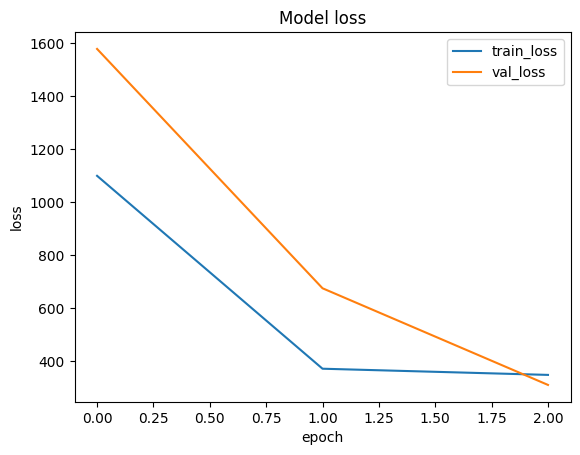

In [43]:
# Representamos los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [44]:
# # Guardamos la arquitectura del modelo en un JSON para luego usarlo

# model_json = model_1_facialKeyPoints.to_json()
# with open("FacialKeyPoints-model.json","w") as json_file:
#   json_file.write(model_json)

In [46]:
# with open('FacialKeyPoints-model.json', 'r') as json_file:
#     json_savedModel= json_file.read()

# # Cargar la arquitectura del modelo
# model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
# model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
# adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam, metrics= "mean_squared_error")

In [47]:
# kk=model_1_facialKeyPoints.evaluate(X_test, y_test)


14/14 [==============================] - 2s 66ms/step - loss: 310.0543 - mean_squared_error: 310.0543


In [49]:
# with open('detection.json', 'r') as json_file:
#     json_savedModel= json_file.read()

# # Cargar la arquitectura del modelo
# model_2_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
# model_2_facialKeyPoints.load_weights('weights_keypoint.hdf5')
# adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model_2_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['MeanSquaredError '])

In [50]:
# Obtenemos las claves del modelo
# kk=model_1_facialKeyPoints.evaluate(X_test, y_test)

14/14 [==============================] - 1s 66ms/step - loss: 310.0543 - mean_squared_error: 310.0543


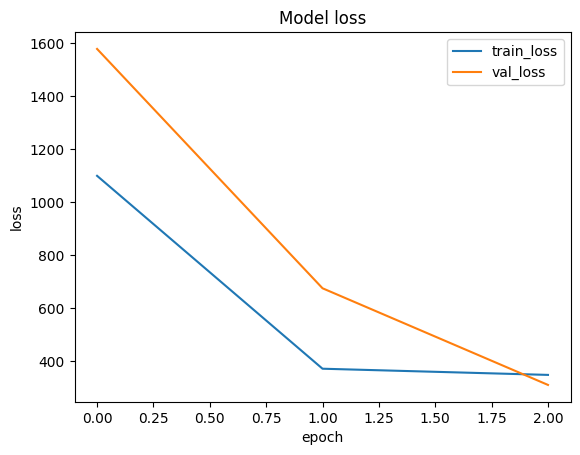

In [53]:
# Representamos los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()